En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:
-Ajustar el modelo a un Random Forest
-Extraer las métricas
-Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('once')

In [15]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd,Genre_map,Cert_map
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429,2,4.0
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227,2,4.0


In [16]:
# Separamos x e y
X = df.drop(["Released_Year", 'Genre','Certificate', 'Runtime','Meta_score','No_of_Votes', 'Gross','Rating_BOX'], axis = 1)
y = df["Rating_BOX"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
param = {"max_depth": [2,4, 6],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]}

In [20]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [21]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=1, min_samples_leaf=10,
                      min_samples_split=50)

Una vez hecho el GridSearchCV vemos que los resultados son max_depth=6, max_features=1, min_samples_leaf=10, min_samples_split=50 y decidimos sacar las métricas para ver la importancia predictora e ir ajustándonos a la más exacta.

In [23]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [24]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

Estamos comprobando la eficiencia de nuestro modelo de predicción con las métricas.Como vemos abajo son una métricas donde R2 no llega al 0.7 con lo que vamos a hacer es ajustar los hiperparámetros.

In [25]:
dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,2.325268e-11,7.238650e-22,2.690474e-11,0.379929,test,Random Forest
1,2.371577e-11,7.735092e-22,2.781203e-11,0.378619,train,Random Forest


In [26]:
param = {"max_depth": [5,6,7],
        "max_features": [1,5,10],
        "min_samples_split": [35,50,70],
        "min_samples_leaf": [5,10,20]}

In [27]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [29]:
x_train.isnull().sum()

IMDB_Rating     0
Ryr_Sklstd      0
Rnt_Sklstd      0
Meta_Sklstd     0
Votes_Sklstd    0
Gross_Sklstd    0
Genre_map       0
Cert_map        0
dtype: int64

In [28]:
gs_rf.fit(x_train, y_train)

/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _disp

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [35, 50, 70]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
bosque = gs_rf.best_estimator_

In [31]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [32]:
dt_results1 = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest2")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,2.172011e-11,6.460120e-22,2.541677e-11,0.446619,test,Random Forest2
1,2.227086e-11,6.941924e-22,2.634753e-11,0.442337,train,Random Forest2


Hemos conseguido ajustar el modelo de predicción y el siguiente paso será invertir el proceso del boxcox para obtener unos datos comprensibles para nuestro cliente.

In [33]:
lambda_ajustada = -9.95

In [35]:
from scipy.special import boxcox, inv_boxcox

In [38]:
dt_results1['RMSE_INVERTIDA']=dt_results1['RMSE'].apply(lambda x: inv_boxcox(x, lambda_ajustada))

In [39]:
dt_results1

,MAE,MSE,RMSE,R2,set,modelo,RMSE_TR,RMSE_INVERTIDA
0,2.172011e-11,6.460120e-22,2.541677e-11,0.446619,test,Random Forest2,1.0,1.0
1,2.227086e-11,6.941924e-22,2.634753e-11,0.442337,train,Random Forest2,1.0,1.0


Le podemos explicar al cliente que hará las predicciones con un error de un punto cuando estamos trabajando con intervalos de 0 a 10. Al obtener 1 significa que lo va a modificar mínimamente (valor 1)

Vamos a analizar en un dataframe la importancia de las variables predictoras para descubrir cuáles son realmente influyentes en nuestro modelo.

In [40]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Meta_Sklstd,0.168690
7,Cert_map,0.163363
5,Gross_Sklstd,0.153016
6,Genre_map,0.134980
0,IMDB_Rating,0.131449
2,Rnt_Sklstd,0.118352
1,Ryr_Sklstd,0.116865
4,Votes_Sklstd,0.013284


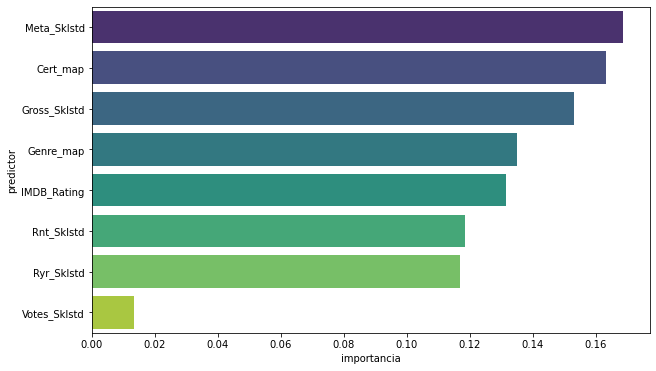

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()